# データサイエンス超入門: 分類演習課題

#### 学科：工学部応用化学科 
#### 学籍番号：03220724　　　 　　　　
#### 氏名：ウン　ピチポンサー　タニソーン

a,b,c,d,eは５名の被験者名を表す。被験者名のついているファイルはあるときの被験者の数十mにわたる歩行を約5msec間隔で、被験者のポケットに入れたスマホで観測したもので、第１-3列がx,y,z,軸の加速度、第4-6列が3軸周りの角加速度を表す(*)。一方、test1-24は、 a,b,c,d,eのいずれかの被験者の別の時点での数mにわたる歩行をスマホで観測したもので、 a,b,c,d,eと同様の内容になっている。ファイルa,b,c,d,eを用いて、test1-24のそれぞれがどの被験者のものであるか推定せよ。

(*)地表に対して水平東方向をx 軸，地表に対して水平北方向をy 軸，地表に対して鉛直上方向をz 軸とする座標系に変換済み。データは、以下の修士論文の実験において収集されたものを、塩井氏の同意のもとに流用。
塩井悠太郎、「スマートフォンを用いた歩行動作に基づく脚力異常検知」、東京大学情報理工学研究科システム情報学専攻修士論文、2021年3月

A, B, C, D, and E represent the names of the five subjects. The files with the names of the subjects were observed by a smartphone in the subject's pocket at approximately 5 msec intervals as the subject walked over several tens of meters at a certain time, with columns 1-3 representing the acceleration in the x, y, z, and axis and columns 4-6 representing the angular acceleration around the three axes (*). On the other hand, test1-24 is a smartphone observation of a subject a,b,c,d,e walking over several meters at a different time point, similar to a,b,c,d,e. Using files a,b,c,d,e, estimate which subject each of test1-24 belongs to.

(*) The data have been transformed into a coordinate system with the x-axis in the horizontal east direction relative to the earth's surface, the y-axis in the horizontal north direction relative to the earth's surface, and the z-axis in the vertical up direction relative to the earth's surface. Data were collected in the following master's thesis experiment and were appropriated with the consent of Mr. Shioi.
Yutaro Shioi, "Abnormal Leg Force Detection Based on Walking Motion Using Smartphone," Master's Thesis, Department of Systems Informatics, Graduate School of Information Science and Engineering, The University of Tokyo, March 2021.



評価：自身の作った提出プログラムが適切に動作し、その結果得られた出力であると認められたうえで、不正解数が2以下ならA、3か4ならB、5か6ならC、それ以外はDとする。注） test1-24の推定を行う前に、a-eのファイルの一部をテストデータとして用いて、適切な推定方法を見出した後、test1-24を試みよ。

提出物：①添付のexcelファイル（回答様式）に推定結果を半角小文字で入力して提出する。
さらに、②（必要に応じて、採点者が簡単に当該プログラムを実行して結果を確認できるよう）プログラムファイル、③確かに当該プログラムで提出した結果が得れることを示すスクリーンショットなどの証跡、④手法の概要説明、を別ファイルで提出する。ファイル圧縮はしない。

再提出：提出後1度目の評価を提示する。１度目の期限に間に合わなかった学生、評価が低かった学生は（プログラムを改良して）再提出期限までに再提出することができる。最終評価は、最初の評価と良い方を採用する。

Evaluation: After accepting that the submitted program you created worked properly and that the output was obtained as a result, you will receive an A if the number of incorrect answers is 2 or less, a B if the number of incorrect answers is 3 or 4, a C if the number is 5 or 6, and a D otherwise. Note: Before estimating test1-24, use some of the files a-e as test data to find the appropriate estimation method and then attempt test1-24.

Submissions: 

(1) Type the estimation results in lowercase letters in the attached excel file (response form).

In addition, submit 

(2) the program file (so that the scorer can easily run the program and check the results, if necessary), 

(3) a screen shot or other evidence that the program does indeed produce the submitted results, and 

(4) a brief description of the method, in a separate file. Do not compress the files.

Resubmission: The first evaluation will be presented after submission; students who did not meet the first deadline or who received a lower evaluation may resubmit (with program improvements) by the resubmission deadline. The final evaluation will be the better of the first evaluation.


# Loading Libraries

In [1]:
import pandas as pd
import numpy as np 
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from tensorflow import keras
from collections import OrderedDict
from collections import Counter
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Visualizing

In [2]:
df_a = pd.read_csv("分類課題データ/a.csv")
df_b = pd.read_csv("分類課題データ/b.csv")
df_c = pd.read_csv("分類課題データ/c.csv")
df_d = pd.read_csv("分類課題データ/d.csv")
df_e = pd.read_csv("分類課題データ/e.csv")

<AxesSubplot:>

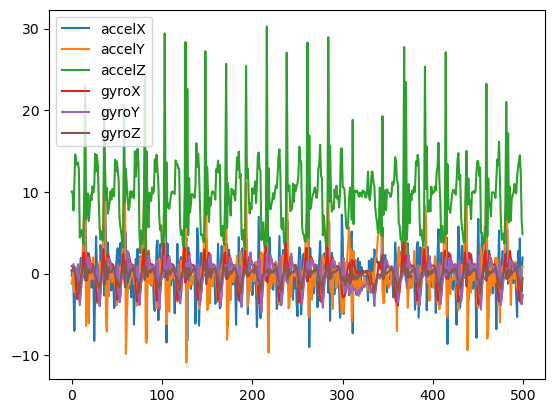

In [3]:
df_a.plot()

<AxesSubplot:>

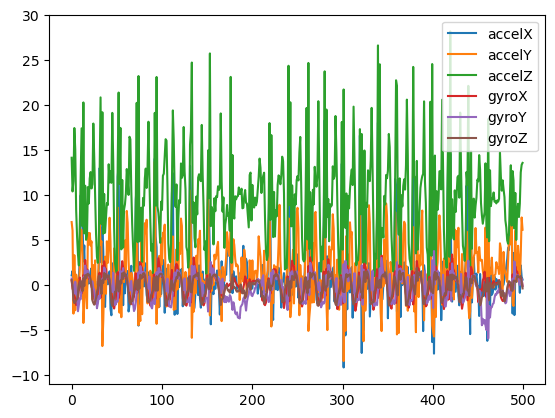

In [4]:
df_b.plot()

# Preprocessing

In [5]:
sq_size = 36

In [6]:
print(len(df_a))
print(len(df_b))
print(len(df_c))
print(len(df_d))
print(len(df_e))

500
500
500
500
500


In [7]:
# Generated training sequences for use in the model.
def create_seq(values, time_steps=sq_size):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)

def prepro(sq_all, scaler):
    arr_ = []
    for i in sq_all:
        arr = scaler.transform(i)
        arr_.append(arr)
    X = np.array(arr_)
    return X

In [8]:
sq_all = np.concatenate([create_seq(df_a),create_seq(df_b),create_seq(df_c),create_seq(df_d),create_seq(df_e)])
df_all = pd.DataFrame(pd.concat([df_a,df_b,df_c,df_d,df_e]).values)

In [9]:
sq_all.shape

(2325, 36, 6)

In [10]:
df_all.shape

(2500, 6)

In [11]:
#Normalization with StandardScaler()
scaler = StandardScaler()
scaler_ = scaler.fit(df_all)

In [12]:
X = prepro(sq_all=sq_all, scaler = scaler_)
n = 500-sq_size+1
Y = np.array([[0]*n+[1]*n+[2]*n+[3]*n+[4]*n]).transpose()

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.10, random_state=12345)

In [14]:
X_train.shape

(2092, 36, 6)

In [15]:
Y_train.shape

(2092, 1)

# Model

In [16]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=sq_size, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=sq_size, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=sq_size, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(5, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=(X_train.shape[1],X_train.shape[2])) #36,6
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 36, 6)]           0         
                                                                 
 conv1d (Conv1D)             (None, 36, 36)            684       
                                                                 
 batch_normalization (BatchN  (None, 36, 36)           144       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 36, 36)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 36, 36)            3924      
                                                                 
 batch_normalization_1 (Batc  (None, 36, 36)           144       
 hNormalization)                                             

# Training

In [17]:
epochs = 500
batch_size = 5

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    verbose=1,
)

Epoch 1/500
419/419 [==============================] - 6s 5ms/step - loss: 0.3017 - sparse_categorical_accuracy: 0.9608 - lr: 0.0010
Epoch 2/500
419/419 [==============================] - 2s 5ms/step - loss: 0.0535 - sparse_categorical_accuracy: 0.9971 - lr: 0.0010
Epoch 3/500
419/419 [==============================] - 2s 5ms/step - loss: 0.0356 - sparse_categorical_accuracy: 0.9962 - lr: 0.0010
Epoch 4/500
419/419 [==============================] - 2s 5ms/step - loss: 0.0131 - sparse_categorical_accuracy: 1.0000 - lr: 0.0010
Epoch 5/500
419/419 [==============================] - 2s 5ms/step - loss: 0.0111 - sparse_categorical_accuracy: 0.9995 - lr: 0.0010
Epoch 6/500
419/419 [==============================] - 2s 5ms/step - loss: 0.0070 - sparse_categorical_accuracy: 0.9990 - lr: 0.0010
Epoch 7/500
419/419 [==============================] - 2s 5ms/step - loss: 0.0130 - sparse_categorical_accuracy: 0.9976 - lr: 0.0010
Epoch 8/500
419/419 [==============================] - 3s 6ms/step - 

419/419 [==============================] - 2s 4ms/step - loss: 0.0062 - sparse_categorical_accuracy: 0.9986 - lr: 0.0010
Epoch 62/500
419/419 [==============================] - 2s 4ms/step - loss: 5.1317e-04 - sparse_categorical_accuracy: 1.0000 - lr: 0.0010
Epoch 63/500
419/419 [==============================] - 1s 4ms/step - loss: 0.0032 - sparse_categorical_accuracy: 0.9995 - lr: 0.0010
Epoch 64/500
419/419 [==============================] - 2s 4ms/step - loss: 4.6508e-04 - sparse_categorical_accuracy: 1.0000 - lr: 0.0010
Epoch 65/500
419/419 [==============================] - 1s 3ms/step - loss: 3.3387e-04 - sparse_categorical_accuracy: 1.0000 - lr: 0.0010
Epoch 66/500
419/419 [==============================] - 1s 3ms/step - loss: 1.3296e-04 - sparse_categorical_accuracy: 1.0000 - lr: 0.0010
Epoch 67/500
419/419 [==============================] - 1s 3ms/step - loss: 4.0342e-04 - sparse_categorical_accuracy: 1.0000 - lr: 0.0010
Epoch 68/500
419/419 [==============================] -

419/419 [==============================] - 1s 3ms/step - loss: 0.0053 - sparse_categorical_accuracy: 0.9986 - lr: 1.2500e-04
Epoch 120/500
419/419 [==============================] - 2s 4ms/step - loss: 0.0066 - sparse_categorical_accuracy: 0.9976 - lr: 1.2500e-04
Epoch 121/500
419/419 [==============================] - 2s 4ms/step - loss: 1.2456e-04 - sparse_categorical_accuracy: 1.0000 - lr: 1.2500e-04
Epoch 122/500
419/419 [==============================] - 1s 3ms/step - loss: 1.4913e-04 - sparse_categorical_accuracy: 1.0000 - lr: 1.2500e-04
Epoch 123/500
419/419 [==============================] - 1s 3ms/step - loss: 1.0533e-04 - sparse_categorical_accuracy: 1.0000 - lr: 1.2500e-04
Epoch 124/500
419/419 [==============================] - 1s 3ms/step - loss: 1.0616e-04 - sparse_categorical_accuracy: 1.0000 - lr: 1.2500e-04
Epoch 125/500
419/419 [==============================] - 1s 3ms/step - loss: 0.0039 - sparse_categorical_accuracy: 0.9990 - lr: 1.2500e-04
Epoch 126/500
419/419 [==

# Evaluation

In [18]:
pred = model.predict(X_test)
res = []
for p in pred:
    res.append(p.argmax())
print('The accuracy score on the test set is %.2f'%accuracy_score(res,Y_test))

8/8 [==============================] - 0s 4ms/step
The accuracy score on the test set is 1.00


In [19]:
print(classification_report(res,Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        37

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



# Prediction

In [20]:
test_dict = {}
for name in os.listdir("分類課題データ/"):
    if name.startswith("test"):
        test_dict[name]=pd.read_csv(f"分類課題データ/{name}")


In [21]:
predict = {}
for key in test_dict.keys():
    print(key)
    df = test_dict[key]
    sq_all = prepro(create_seq(df), scaler = scaler_)
    pred = model.predict(sq_all)
    res = []
    for p in pred:
        res.append(p.argmax())
    result = list(set(res))
    if len(result)>1:
        print("prediction is not consistent")
        freq = dict(Counter(res))
        print(freq)
        result_ = max(freq, key=freq.get)
    else:
        result_ = result[0]
    print(f"prediction result is {result_}")
    new_key = int(key.replace("test","").replace(".csv",""))
    predict[new_key] = result_

#order the dict 
predict = dict(OrderedDict(sorted(predict.items())))
    

test1.csv
1/1 [==============================] - 0s 25ms/step
prediction result is 2
test10.csv
1/1 [==============================] - 0s 25ms/step
prediction result is 0
test11.csv
1/1 [==============================] - 0s 28ms/step
prediction result is 1
test12.csv
1/1 [==============================] - 0s 20ms/step
prediction result is 4
test13.csv
1/1 [==============================] - 0s 27ms/step
prediction result is 1
test14.csv
1/1 [==============================] - 0s 21ms/step
prediction result is 2
test15.csv
1/1 [==============================] - 0s 25ms/step
prediction result is 4
test16.csv
1/1 [==============================] - 0s 25ms/step
prediction result is 4
test17.csv
1/1 [==============================] - 0s 28ms/step
prediction result is 4
test18.csv
1/1 [==============================] - 0s 21ms/step
prediction result is 2
test19.csv
1/1 [==============================] - 0s 23ms/step
prediction result is 0
test2.csv
1/1 [==============================] - 0s 22m

In [22]:
predict

{1: 2,
 2: 4,
 3: 1,
 4: 0,
 5: 2,
 6: 1,
 7: 4,
 8: 3,
 9: 0,
 10: 0,
 11: 1,
 12: 4,
 13: 1,
 14: 2,
 15: 4,
 16: 4,
 17: 4,
 18: 2,
 19: 0,
 20: 0,
 21: 0,
 22: 4,
 23: 2,
 24: 2}

In [23]:
mapper = {0:'a',1:'b',2:'c',3:'d',4:'e'}
predict_map = pd.Series(predict).map(mapper)
print(predict_map)

1     c
2     e
3     b
4     a
5     c
6     b
7     e
8     d
9     a
10    a
11    b
12    e
13    b
14    c
15    e
16    e
17    e
18    c
19    a
20    a
21    a
22    e
23    c
24    c
dtype: object


In [24]:
answer_sheet = pd.read_excel('回答様式_blank.xlsx')
answer_sheet

,test 番号,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,推定結果(a-e),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,半角小文字,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
answer_sheet.iloc[0,1:] = predict_map

In [26]:
answer_sheet

,test 番号,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,推定結果(a-e),c,e,b,a,c,b,e,d,a,a,b,e,b,c,e,e,e,c,a,a,a,e,c,c
1,半角小文字,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
answer_sheet.to_excel("回答様式_draft.xlsx")

# Assignment End here